In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, optimizers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, Softmax, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.utils import plot_model

In [3]:
#Load cifar 10  and split it .
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
 
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000,)
Test samples: (10000, 32, 32, 3) (10000,)


In [5]:
# Sampleof given image data :
labels=['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

NameError: name 'train_labels' is not defined

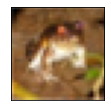

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(labels[train_labels[i][0]])
plt.show()

In [ ]:
#Pre-trained model
ptr_model = VGG19(include_top = False, input_shape = (32,32,3))
ptr_model.trainable = True


In [ ]:
ptr_model.summary()


In [ ]:
#plot_model(ptr_model)

In [ ]:
model = Sequential()
model.add(ptr_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 20,197,514
Trainable params: 20,197,514
Non-trainable params: 0
____________________________________________

In [14]:
Opt = optimizers.Adam(learning_rate=0.0001) #Other options: Adagrad, SGD, Adam... 
model.compile(optimizer=Opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))



Epoch 1/10


C:\Users\Amir Hossein\.conda\envs\GPU_Ev\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1563/1563 [==============================] - 95s 57ms/step - loss: 1.0029 - accuracy: 0.6545 - val_loss: 0.7445 - val_accuracy: 0.7566
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6035 - accuracy: 0.8021 - val_loss: 0.5714 - val_accuracy: 0.8144
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.4531 - accuracy: 0.8505 - val_loss: 0.5593 - val_accuracy: 0.8250
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.3558 - accuracy: 0.8833 - val_loss: 0.5262 - val_accuracy: 0.8324 - los - ETA: 0s - loss: 0.3562 - ac
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.2682 - accuracy: 0.9128 - val_loss: 0.4802 - val_accuracy: 0.8528
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.2036 - accuracy: 0.9346 - val_loss: 0.5276 - val_accuracy: 0.8523
Epoch 7/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.1664 - accuracy: 0.

In [17]:
# save weights to file
model.save_weights("cifer10_VGG19_Weights.h5")

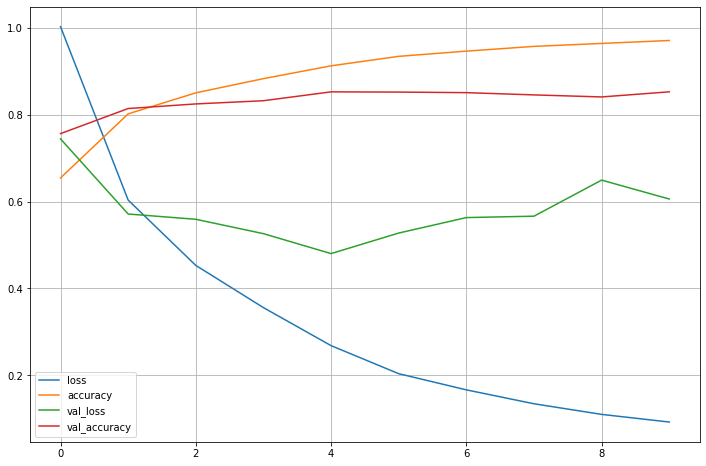

In [18]:
frame = pd.DataFrame(history.history)

frame.plot(figsize=(12,8))
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

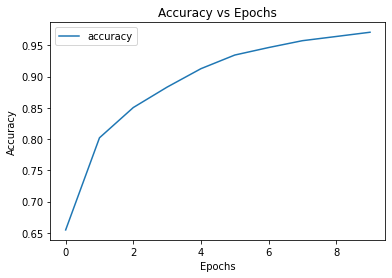

In [19]:
acc_plot = frame.plot(y='accuracy', title='Accuracy vs Epochs')
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

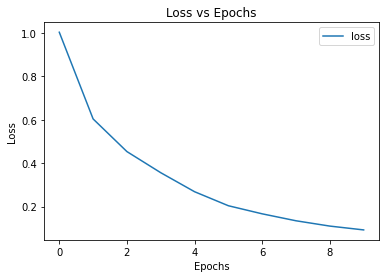

In [20]:
loss_plot = frame.plot(y='loss', title='Loss vs Epochs')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

In [26]:
#Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels , verbose=2)
print(f"Test loss: {test_loss:0.3f}")
print(f"Test accuracy: {test_acc:0.3f}")



313/313 - 4s - loss: 0.6060 - accuracy: 0.8529
Test loss: 0.606
Test accuracy: 0.853


In [1]:
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Class {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

NameError: name 'test_images' is not defined

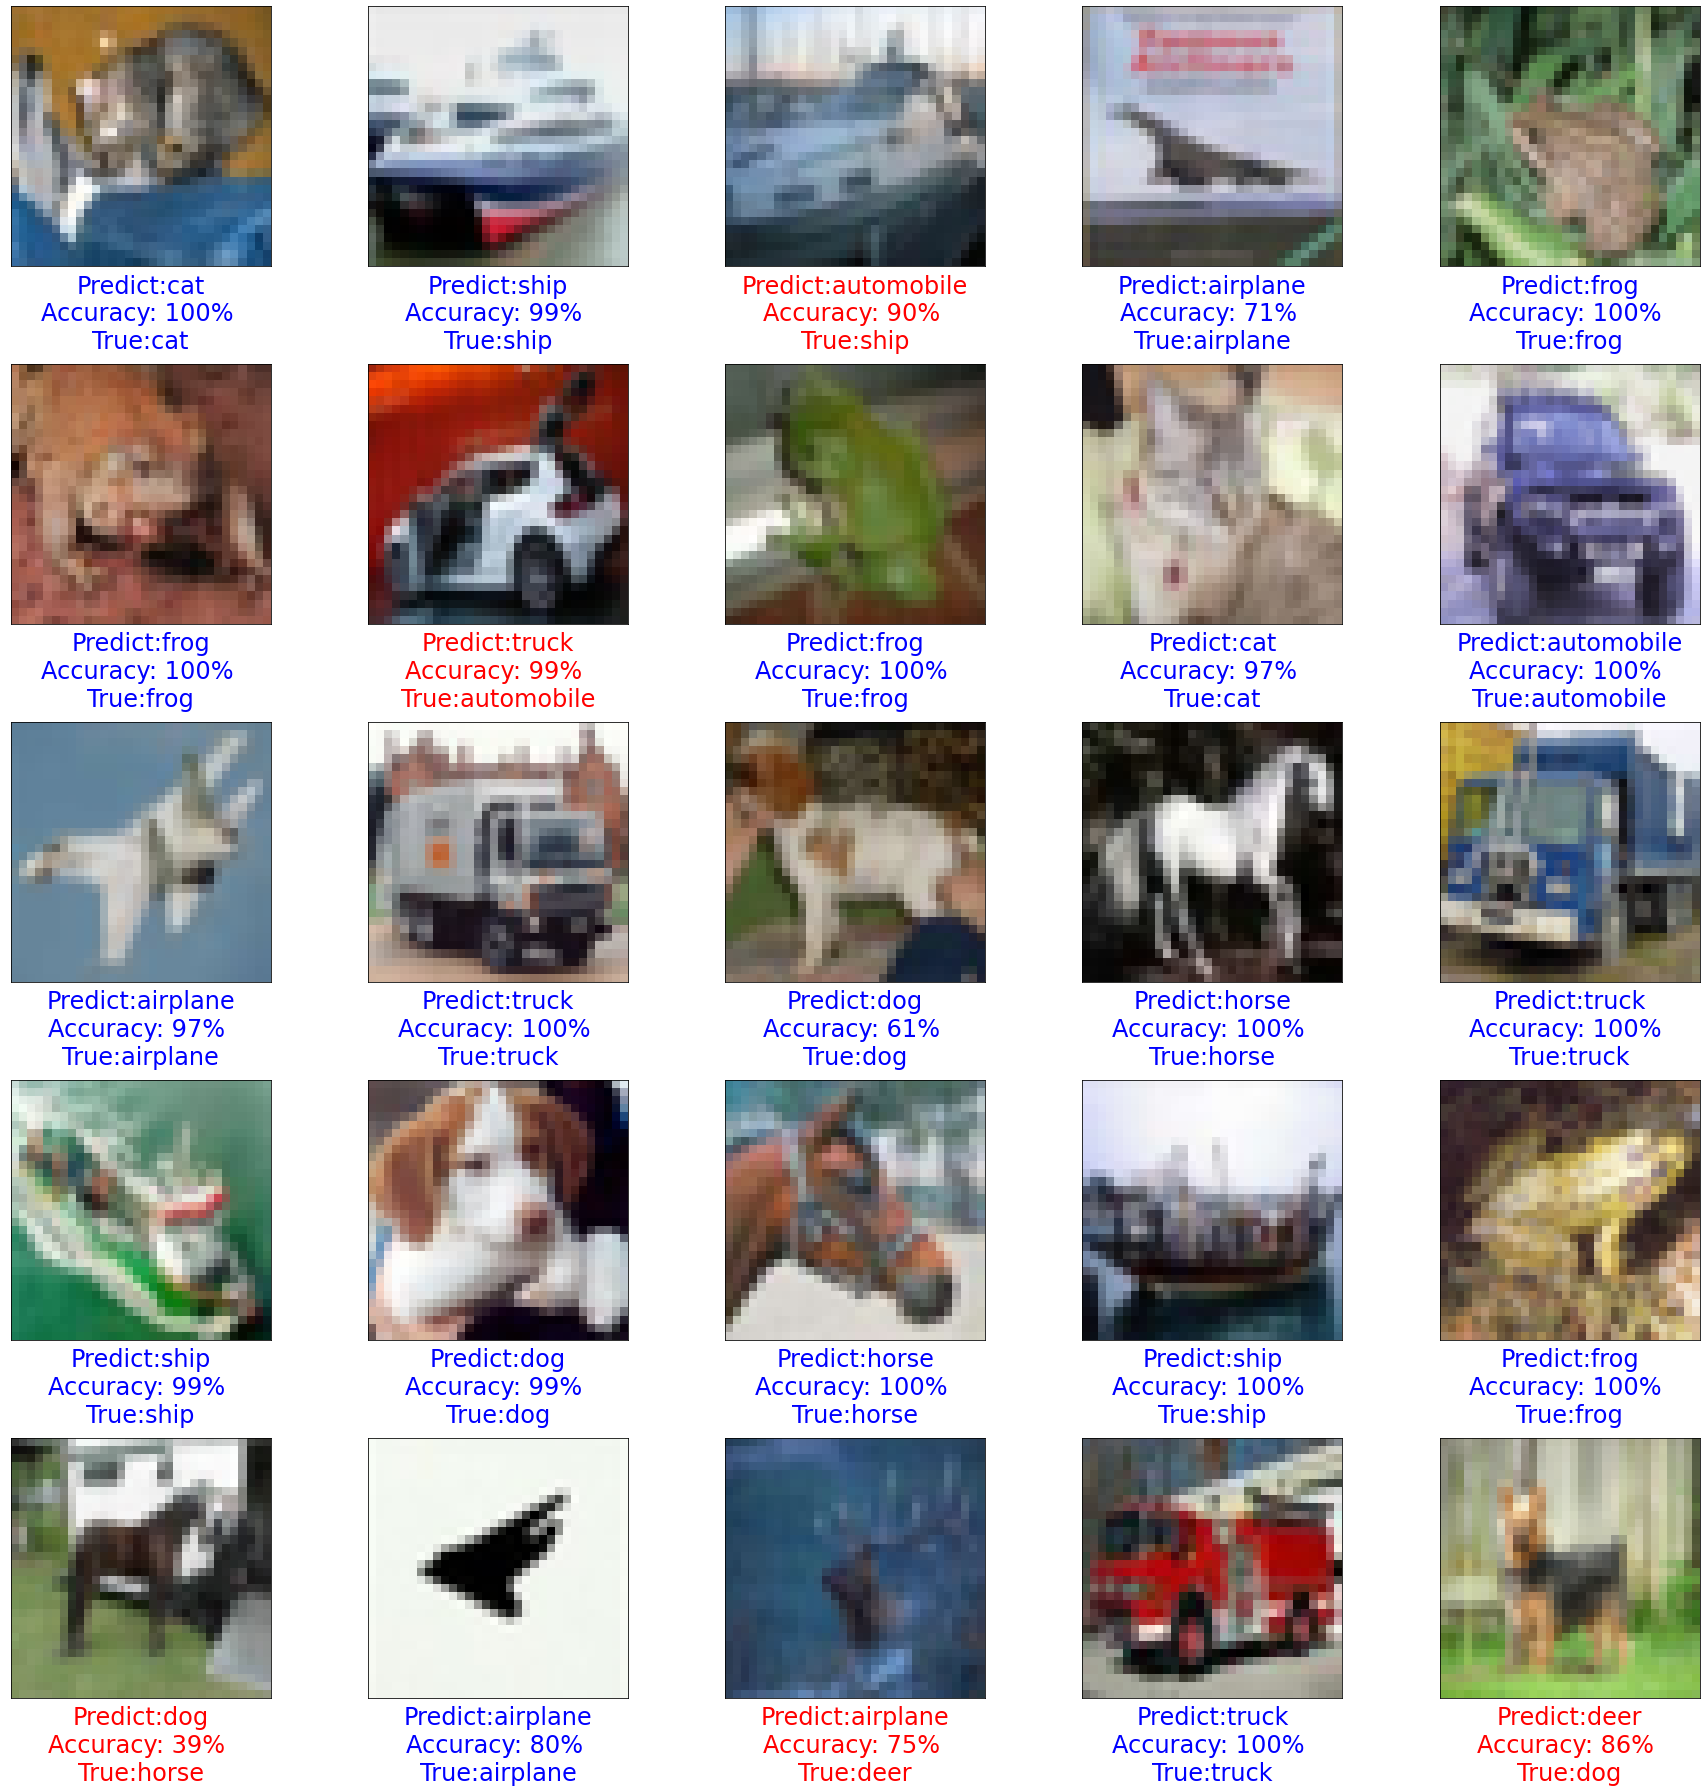

In [44]:
def plot_sample(i,predic_array,true_lables,images):
    predic_array,true_lable ,img = predic_array[i],true_lables[i],images[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    prediced_label = np.argmax(predic_array)
    if prediced_label == true_lable:
        
       # print(F"{predic_label}=={true_lable}")
        color="blue"
    else: 
        #print(F"{predic_label}!={true_lable}")
        color="red"
        
    plt.xlabel(f"Predict:{labels[prediced_label]}\nAccuracy: {100*np.max(predic_array):2.0f}% \nTrue:{labels[true_lable]}",size=24,color=color)
        
        
row = 5
column = 5
images = row * column
plt.figure(figsize = (5 * row,5 * column))
test_images =x_test[:images] 
test_lables =y_test[:images]
predictions = model.predict(test_images)
for i in range(images):
    plt.subplot(row,column ,i+1)
    #print(test_lables[i])
    plot_sample(i,predictions,test_lables,test_images)
    

plt.tight_layout()
plt.show()